In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [3]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
test_df.head(10)
test_df.shape

(4277, 13)

In [6]:
print(train_df["HomePlanet"].unique())
print(np.count_nonzero(train_df["Cabin"].unique()))
print(train_df["Destination"].unique())


np.count_nonzero(train_df["Destination"].unique())

['Europa' 'Earth' 'Mars' nan]
6561
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


4

(array([12.,  4., 12., 17., 16., 13.,  9.,  8.,  2.,  5.]),
 array([ 0. ,  6.2, 12.4, 18.6, 24.8, 31. , 37.2, 43.4, 49.6, 55.8, 62. ]),
 <BarContainer object of 10 artists>)

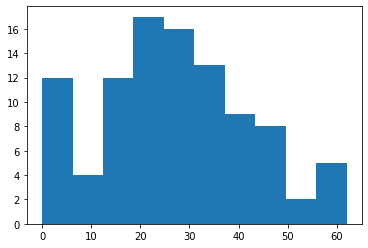

In [7]:
import matplotlib.pyplot as plt
train_df["HomePlanet"]

train_sample = train_df[:100]

plt.hist(train_sample["Age"])

In [8]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

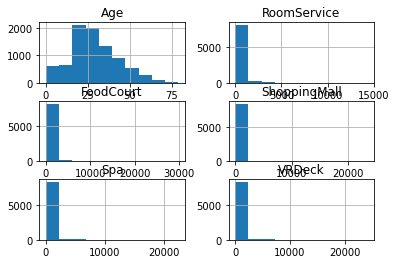

In [9]:
train_df.hist()

<AxesSubplot:ylabel='HomePlanet'>

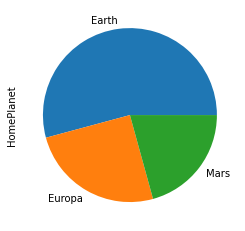

In [10]:
train_df["HomePlanet"].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Destination'>

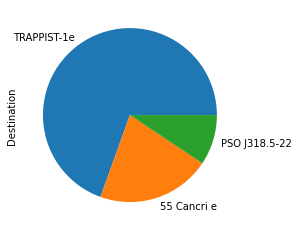

In [11]:
train_df["Destination"].value_counts().plot(kind='pie')

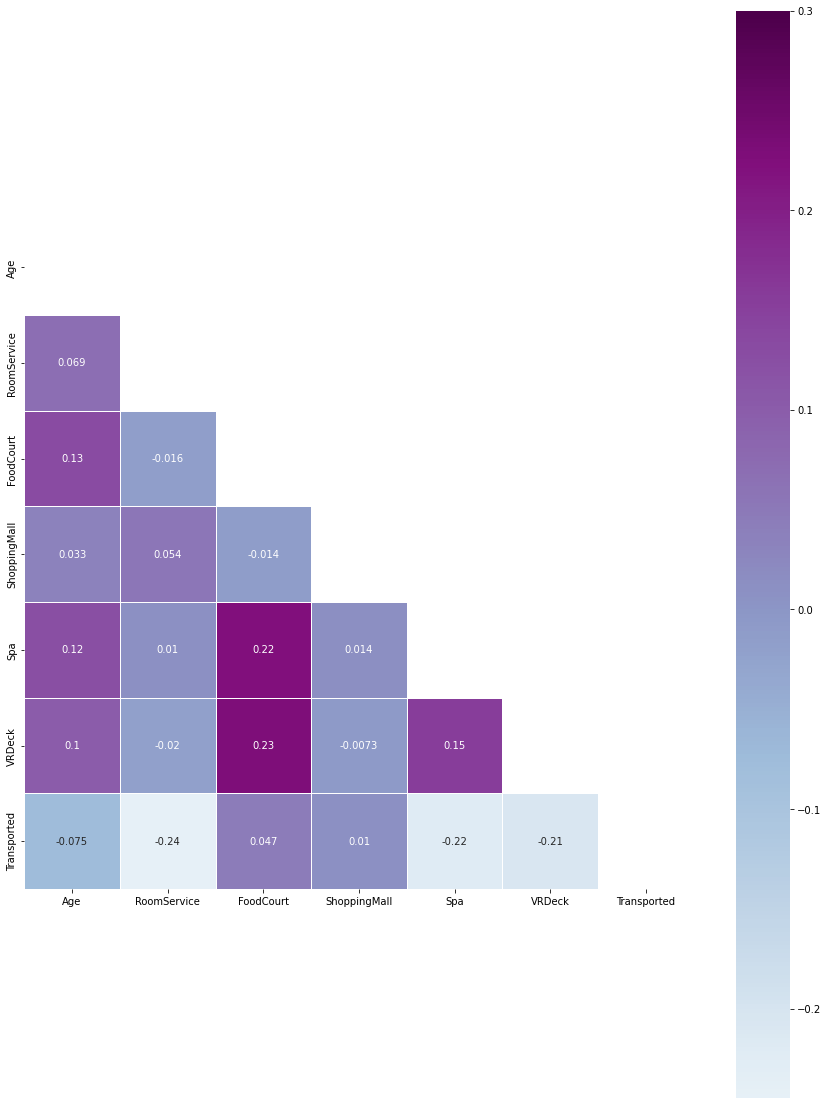

In [12]:
import seaborn as sns
plt.figure(figsize=(15,20))
corr=train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='BuPu', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

We must convert the categorical features

In [13]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [14]:
#train_df = train_df.drop(columns=['Cabin','PassengerId','Name'])
#test_df = test_df.drop(columns=['Cabin','PassengerId','Name'])

train_df = train_df.drop(columns=['PassengerId','Name'])
test_df = test_df.drop(columns=['PassengerId','Name'])

In [15]:
#print(train_df.isnull().values.any())
#train_df = train_df.dropna(axis=0)
#print(train_df.isnull().values.any())


fill = train_df['Cabin'].value_counts().index[0]
train_df['Cabin'] = train_df['Cabin'].fillna(fill)

fill = test_df['Cabin'].value_counts().index[0]
test_df['Cabin'] = test_df['Cabin'].fillna(fill)

In [16]:
def extract_deck(s):
    return s.split('/')[0]

def extract_num(s):
    return s.split('/')[1]

def extract_side(s):
    return s.split('/')[2]

#train_df = train_df['Cabin'].dropna(axis=0)



train_df['Deck'] = train_df['Cabin'].astype(str).apply(extract_deck)
#train_df['Num'] = train_df['Cabin'].astype(str).apply(extract_num)
train_df['Side'] = train_df['Cabin'].astype(str).apply(extract_side)

test_df['Deck'] = test_df['Cabin'].astype(str).apply(extract_deck)
#test_df['Num'] = test_df['Cabin'].astype(str).apply(extract_num)
test_df['Side'] = test_df['Cabin'].astype(str).apply(extract_side)

In [17]:
def testNulls(df):
    for feat in df.columns:
        print(f"feat {feat} nulls {df[feat].isna().sum()}")
        
testNulls(train_df)    

feat HomePlanet nulls 201
feat CryoSleep nulls 217
feat Cabin nulls 0
feat Destination nulls 182
feat Age nulls 179
feat VIP nulls 203
feat RoomService nulls 181
feat FoodCourt nulls 183
feat ShoppingMall nulls 208
feat Spa nulls 183
feat VRDeck nulls 188
feat Transported nulls 0
feat Deck nulls 0
feat Side nulls 0


In [18]:
def convertToZeroOne(df, features):
    for f in features:
        df.loc[df[f] > 0, f] = 1
        

def categorizeAge(df,feature):
    df['Age'] = df['Age'].apply(lambda x: 1 if x > 0 and x<10 else x)
    df['Age'] = df['Age'].apply(lambda x: 2 if x >= 10 and x<20 else x)
    df['Age'] = df['Age'].apply(lambda x: 3 if x >= 20 and x<30 else x)
    df['Age'] = df['Age'].apply(lambda x: 4 if x >= 30 and x<40 else x)
    df['Age'] = df['Age'].apply(lambda x: 5 if x >= 40 and x<50 else x)
    df['Age'] = df['Age'].apply(lambda x: 6 if x >= 50 and x<60 else x)
    df['Age'] = df['Age'].apply(lambda x: 7 if x >= 60 and x<70 else x)
    df['Age'] = df['Age'].apply(lambda x: 8 if x >= 70 and x<80 else x)
    df['Age'] = df['Age'].apply(lambda x: 9 if x >= 80 else x)
    
    

feat = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
convertToZeroOne(train_df, feat)
convertToZeroOne(test_df, feat)

categorizeAge(train_df, 'Age')
categorizeAge(test_df, 'Age')

train_df.head(10)

#print(np.count_nonzero(train_df["ShoppingMall"].unique()))
#plt.hist(shoppingMall2)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,B/0/P,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,F/0/S,TRAPPIST-1e,3.0,False,1.0,1.0,1.0,1.0,1.0,True,F,S
2,Europa,False,A/0/S,TRAPPIST-1e,6.0,True,1.0,1.0,0.0,1.0,1.0,False,A,S
3,Europa,False,A/0/S,TRAPPIST-1e,4.0,False,0.0,1.0,1.0,1.0,1.0,False,A,S
4,Earth,False,F/1/S,TRAPPIST-1e,2.0,False,1.0,1.0,1.0,1.0,1.0,True,F,S
5,Earth,False,F/0/P,PSO J318.5-22,5.0,False,0.0,1.0,0.0,1.0,0.0,True,F,P
6,Earth,False,F/2/S,TRAPPIST-1e,3.0,False,1.0,1.0,1.0,0.0,0.0,True,F,S
7,Earth,True,G/0/S,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,NaN,True,G,S
8,Earth,False,F/3/S,TRAPPIST-1e,4.0,False,0.0,1.0,1.0,1.0,0.0,True,F,S
9,Europa,True,B/1/P,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,True,B,P


In [19]:
print(train_df['Deck'].unique())
print(test_df['Deck'].unique())

print(train_df['Side'].unique())
print(test_df['Side'].unique())


['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['G' 'F' 'C' 'B' 'D' 'E' 'A' 'T']
['P' 'S']
['S' 'P']


In [20]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices(tf.constant(['Europa', 'Earth', 'Mars']))

lookup = tf.keras.layers.StringLookup(max_tokens=4, oov_token='[UNK]')
lookup.adapt(dataset)
lookup.get_vocabulary()

print(lookup.get_vocabulary())



print("train_df shape", train_df.shape)
print("test_df shape", test_df.shape)

train_df = pd.get_dummies(train_df, columns=["HomePlanet","Destination","Deck","Side"])
test_df = pd.get_dummies(test_df, columns=["HomePlanet","Destination","Deck","Side"])

train_df = pd.get_dummies(train_df, columns=["Age"])
test_df = pd.get_dummies(test_df, columns=["Age"])

train_df = train_df.dropna(axis=0)
#test_df = test_df.dropna(axis=0)
test_df.fillna(0, inplace = True) 

train_df["VIP"] = train_df["VIP"].astype(int)
train_df["CryoSleep"] = train_df["CryoSleep"].astype(int)
train_df["Transported"] = train_df["Transported"].astype(int)

train_df["RoomService"] = train_df["RoomService"].astype(int)
train_df["FoodCourt"] = train_df["FoodCourt"].astype(int)
train_df["ShoppingMall"] = train_df["ShoppingMall"].astype(int)
train_df["Spa"] = train_df["Spa"].astype(int)
train_df["VRDeck"] = train_df["VRDeck"].astype(int)

test_df["VIP"] = test_df["VIP"].astype(int)
test_df["CryoSleep"] = test_df["CryoSleep"].astype(int)
test_df["VRDeck"] = test_df["VRDeck"].astype(int)

test_df["RoomService"] = test_df["RoomService"].astype(int)
test_df["FoodCourt"] = test_df["FoodCourt"].astype(int)
test_df["ShoppingMall"] = test_df["ShoppingMall"].astype(int)
test_df["Spa"] = test_df["Spa"].astype(int)



train_df
print("train_df shape", train_df.shape)

2022-03-02 17:53:57.357599: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


['[UNK]', 'Mars', 'Europa', 'Earth']
train_df shape (8693, 14)
test_df shape (4277, 13)
train_df shape (7409, 34)


2022-03-02 17:53:58.565267: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [21]:
def normalizeValues(df, features):
    for feature in features:
        mean = df[feature].mean(axis=0)
        df[feature] -= mean
        std = df[feature].std(axis=0)
        df[feature] /= std
        df[feature] -= mean
        df[feature] /= std
        
print("train_df shape", train_df.shape)        
#normalizeFeatures = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']        
#normalizeFeatures = ['Age']
#normalizeValues(train_df, normalizeFeatures)
#normalizeValues(test_df, normalizeFeatures)
train_df

train_df shape (7409, 34)


,CryoSleep,Cabin,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Side_S,Age_0.0,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0
0,0,B/0/P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,F/0/S,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
2,0,A/0/S,1,1,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,A/0/S,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,F/1/S,0,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,A/98/P,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8689,1,G/1499/S,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
8690,0,G/1500/S,0,0,0,1,1,0,1,1,...,1,0,0,0,1,0,0,0,0,0
8691,0,E/608/S,0,0,1,0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [22]:
from tensorflow import keras
from tensorflow.keras import layers

target_train_df = train_df.pop('Transported')

train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])


#train_df.pop('RoomService')
#train_df.pop('FoodCourt')
#train_df.pop('ShoppingMall')
#train_df.pop('Spa')
#train_df.pop('VRDeck')

print(train_df.head(10))

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(train_df,
          target_train_df,
          epochs=100,
          batch_size=512)


#results = model.evaluate(test_df, target_test_df)



    CryoSleep  VIP  RoomService  FoodCourt  ShoppingMall  Spa  VRDeck  \
0           0    0            0          0             0    0       0   
1           0    0            1          1             1    1       1   
2           0    1            1          1             0    1       1   
3           0    0            0          1             1    1       1   
4           0    0            1          1             1    1       1   
5           0    0            0          1             0    1       0   
6           0    0            1          1             1    0       0   
8           0    0            0          1             1    1       0   
9           1    0            0          0             0    0       0   
11          0    0            1          1             1    1       1   

    HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  ...  Side_S  \
0                  0                  1                0  ...       0   
1                  1                  0           

In [23]:
submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
submission.head()

print(train_df.shape)
print(test_df.shape)

y_preds = model.predict(test_df)

temp = pd.DataFrame(y_preds).T
y_pred = temp.mode(axis=1)[0].astype('int32')

y_preds = y_preds>0.5

submission['Transported'] = y_preds.astype('bool')
submission.to_csv('submission.csv', index=False)

(7409, 32)
(4277, 32)
